# Monte Carlo Simulations

In [1]:
from monte_carlo import current_table, stochastic_projections
from bayesian import Bayesian

import pandas as pd
import numpy as np

In [2]:
# Get the current league table
league_table = current_table()

In [3]:
# Fit model
games = pd.read_csv("../data/fivethirtyeight/spi_matches.csv")
games = (games
    .loc[(games['league_id'] == 2411) | (games['league_id'] == 2412)]
    )

model = Bayesian(games.dropna())
model.fit()

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
Multiprocess sampling (6 chains in 6 jobs)
NUTS: [def_star, tau_def, atts_star, tau_att, intercept, home]


Sampling 6 chains for 1_000 tune and 2_000 draw iterations (6_000 + 12_000 draws total) took 30 seconds.
The number of effective samples is smaller than 25% for some parameters.


In [4]:
# Simulate the rest of the season
n = 250
lt = stochastic_projections(2021, league_table, games, model, n)

In [5]:
def percent_finish(row, pos):
    return np.count_nonzero(
        lt.position[lt.name == row.name].values == pos) / n

heatmap = pd.DataFrame(
    columns=np.arange(1, 21),
    index=lt.name.unique())

for pos in range(1, 21):
    heatmap.loc[:, pos] = heatmap.apply(
        lambda row: percent_finish(row, pos), axis=1)

In [6]:
import matplotlib.pyplot as plt
import matplotlib as mpl
from highlight_text import fig_text
mpl.rcParams['figure.dpi'] = 400

body_font = "Open Sans"
watermark_font = "DejaVu Sans"
text_color = "w"
background = "#282B2F"
title_font = "DejaVu Sans"

mpl.rcParams['xtick.color'] = text_color
mpl.rcParams['ytick.color'] = text_color
mpl.rcParams['text.color'] = text_color
mpl.rcParams['axes.edgecolor'] = text_color
mpl.rcParams['xtick.labelsize'] = 6
mpl.rcParams['ytick.labelsize'] = 6

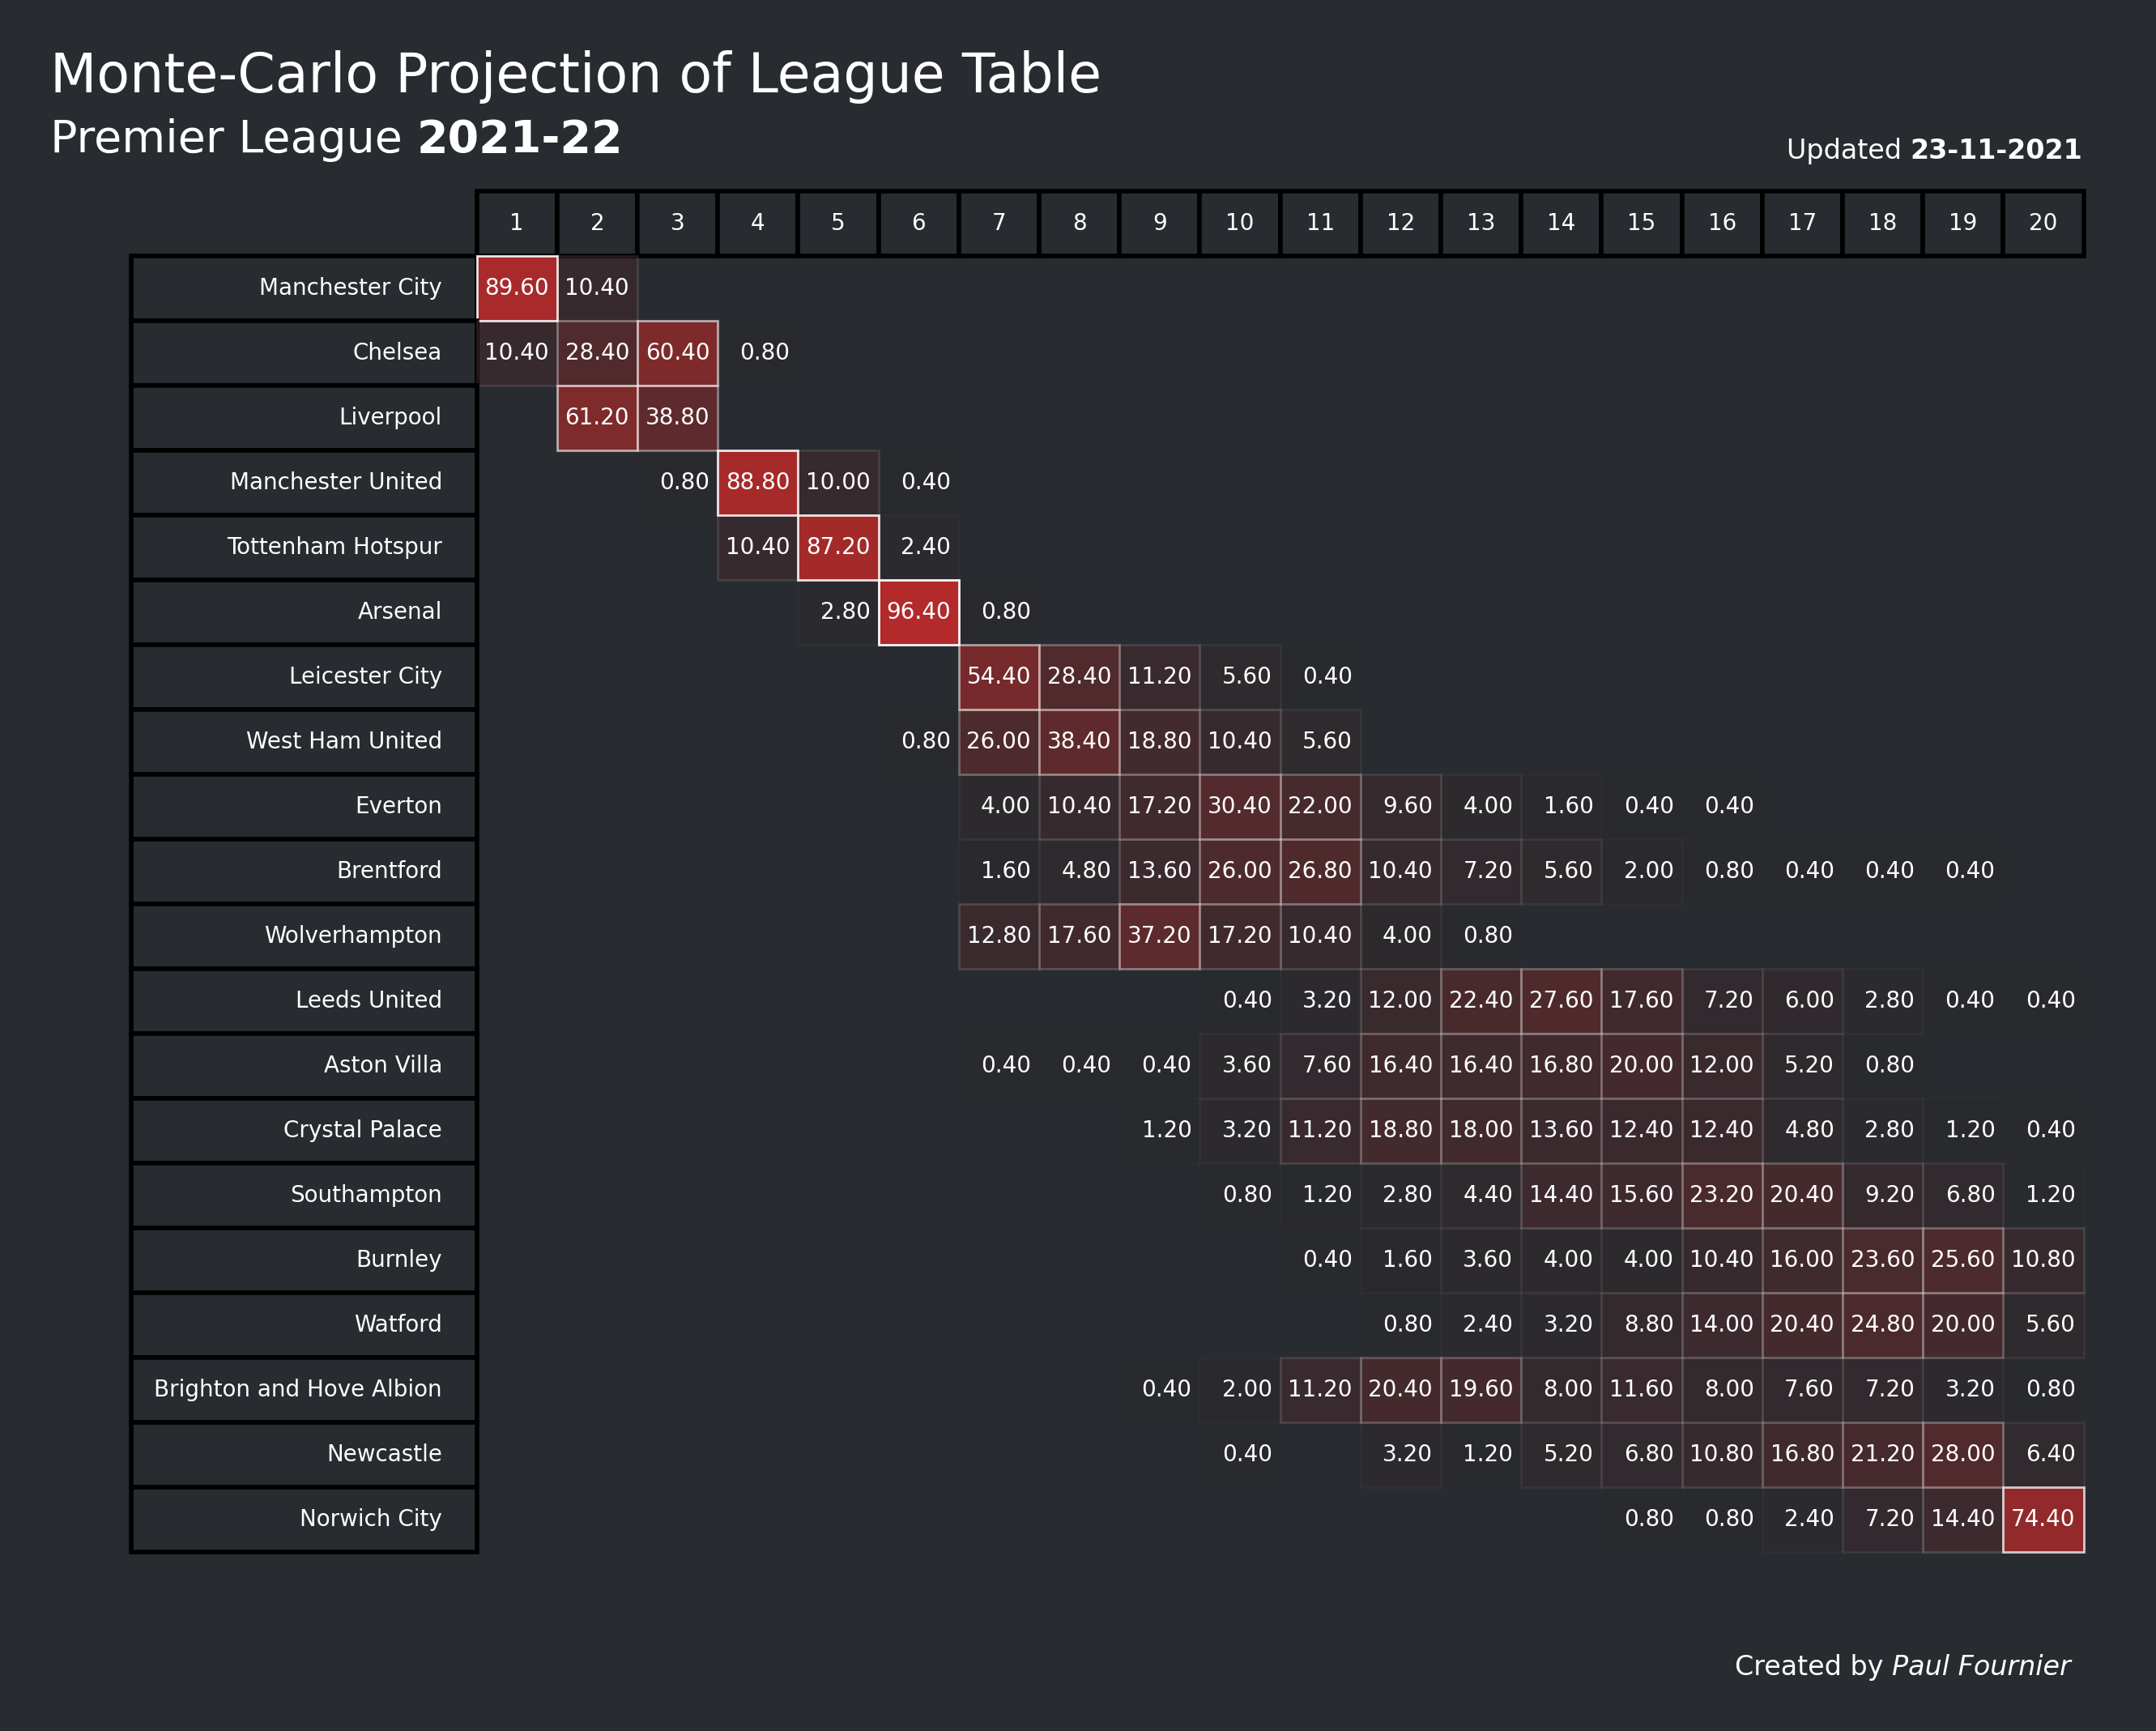

In [7]:
fig, ax = plt.subplots(figsize=(8, 6))
fig.set_facecolor(background)
ax.patch.set_alpha(0)

column_headers = heatmap.columns
row_headers = heatmap.index

background_rgb = [40/255, 43/255, 47/255, 1]
ccolors = np.repeat([background_rgb], len(column_headers), 0)
rcolors = np.repeat([background_rgb], len(row_headers), 0)

cell_text = []
for row in heatmap.values:
    cell_text.append([f'{x*100:1.2f}' if x*100>0.1 else '' for x in row])

the_table = ax.table(
    cellText=cell_text,
    rowLabels=row_headers,
    rowColours=rcolors,
    rowLoc='right',
    colColours=ccolors,
    colLabels=column_headers,
    loc='center right',
    colWidths=[.04]*20,
    fontsize=12
    )
the_table.scale(1, 1.2)


for i in range(1, 21):
    for j in range(0, 20):
        the_table[(i, j)].set_facecolor(background)
        the_table[(i, j)].set_edgecolor('w')
        the_table[(i, j)].set_linewidth(0.5)

        the_table[(i, j)].set_facecolor('#B82A2A')
        the_table[(i, j)].set_alpha(
            heatmap.values[i-1][j])

ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)
plt.box(on=None)

fig_text(
    x=0.1, y=0.925,
    s="Monte-Carlo Projection of League Table",
    fontsize=12, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.1, y=0.89,
    s="Premier League <2021-22>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=10, fontfamily=title_font, color=text_color, alpha=1)
fig_text(
    x=0.77, y=0.88,
    s="Updated <23-11-2021>",
    highlight_textprops=[{"fontweight": "bold"}],
    fontsize=6, fontfamily=title_font, color=text_color, alpha=1)

fig_text(
    x=0.75, y=0.1,
    s="Created by <Paul Fournier>",
    highlight_textprops=[{"fontstyle": "italic"}],
    fontsize=6, fontfamily=watermark_font, color=text_color)

plt.show()